In [2]:
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 17.3 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [3]:
import pandas as pd
import ast  # To safely evaluate string representations of lists

# Load the dataset
train_file = "/kaggle/input/nlp-project/TRAIN - TRAIN.csv.csv"
test_file = "/kaggle/input/nlp-project/TEST - TEST.csv.csv"

train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)


# import re
# # Function to remove only the tuples containing URLs while keeping the rest of the sentence
# def remove_tuples_with_urls(df):
#     url_pattern = re.compile(r'https?://\S+|www\.\S+')
#     return df.iloc[:, 0].astype(str).apply(lambda x: str(re.sub(url_pattern, '', x)))

# # Apply the function to both datasets
# test_data = test_data.copy()
# train_data = train_data.copy()

# test_data.iloc[:, 0] = remove_tuples_with_urls(test_data)
# train_data.iloc[:, 0] = remove_tuples_with_urls(train_data)

# # Display some cleaned samples
# test_data.head(), train_data.head()




# Load CSV


#Function to convert words to lowercase


# def lowercase_and_clean(cell):
#     try:
#         if isinstance(cell, str):
#             cell = ast.literal_eval(cell)  # Convert string to list of tuples
#         if isinstance(cell, list):
#             return [
#                 (word.lower(), tag) 
#                 for word, tag in cell 
#                 if re.match(r'^[\w\s]+$', word)  # Keep only words and whitespace
#             ]
#         else:
#             return cell
#     except:
#         return cell

import re
import ast
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lowercase_clean_lemmatize(cell):
    try:
        if isinstance(cell, str):
            cell = ast.literal_eval(cell)  # Convert string to list of tuples
        if isinstance(cell, list):
            return [
                (
                    word if tag in {'PRON', 'NOUN', 'PROPN'} else lemmatizer.lemmatize(word.lower()), 
                    tag
                )  
                for word, tag in cell 
                if re.match(r'^[a-zA-Z\s]+$', word)  # Keep only words and whitespace
            ]
        else:
            return cell
    except:
        return cell


# Apply transformation to all columns
train_data = train_data.applymap(lowercase_clean_lemmatize)
test_data = test_data.applymap(lowercase_clean_lemmatize)

# Print result
print(train_data.head())
print(test_data.head())





/tmp/ipykernel_10/3514423603.py:78: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train_data = train_data.applymap(lowercase_clean_lemmatize)
/tmp/ipykernel_10/3514423603.py:79: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  test_data = test_data.applymap(lowercase_clean_lemmatize)


                                   [('DF', 'PROPN')]
0                                       [(PM, NOUN)]
1  [(The, DET), (industry, NOUN), (has, VERB), (s...
2  [(Love, VERB), (this, DET), (place, NOUN), (!!...
3  [(This, DET), (problem, NOUN), (of, ADP), (the...
4  [(Esso, PROPN), (said, VERB), (0, X), (the, DE...
                                   [('DF', 'PROPN')]
0                                       [(PM, NOUN)]
1  [(The, DET), (industry, NOUN), (has, VERB), (s...
2  [(Love, VERB), (this, DET), (place, NOUN), (!!...
3  [(This, DET), (problem, NOUN), (of, ADP), (the...
4  [(Esso, PROPN), (said, VERB), (0, X), (the, DE...


In [4]:
# import re
# import ast
# from nltk.stem import WordNetLemmatizer

# lemmatizer = WordNetLemmatizer()

# def lowercase_clean_lemmatize(cell):
#     try:
#         if isinstance(cell, str):
#             cell = ast.literal_eval(cell)  # Convert string to list of tuples
#         if isinstance(cell, list):
#             return [
#                 (lemmatizer.lemmatize(word.lower()), tag)  # Lowercase + Lemmatize
#                 for word, tag in cell 
#                 if re.match(r'^[a-zA-Z\s]+$', word)  # Keep only words and whitespace
#             ]
#         else:
#             return cell
#     except:
#         return cell



# # Apply transformation to all columns
# train_data = train_data.applymap(lowercase_clean_lemmatize)
# test_data = test_data.applymap(lowercase_clean_lemmatize)

# # Print result
# print(train_data.head())
# print(test_data.head())

In [5]:
import re
import ast

def remove_urls(cell):
    try:
        if isinstance(cell, str):
            cell = ast.literal_eval(cell)  # Convert string to list of tuples

        if isinstance(cell, list):
            return [(word, tag) for word, tag in cell if not is_url(word)]
        else:
            return cell
    except:
        return cell

def is_url(word):
    """Check if the given word is a URL"""
    url_pattern = re.compile(r'https?://\S+|www\.\S+|\S+\.(com|org|net|edu|gov|in|co|uk|us|ca|de|fr|jp|cn|au)\b')
    return bool(url_pattern.search(word))

# Apply transformation to remove URLs
train_data = train_data.applymap(remove_urls)
test_data = test_data.applymap(remove_urls)

# Print result
print(train_data.head())
print(test_data.head())


/tmp/ipykernel_10/1942696745.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train_data = train_data.applymap(remove_urls)
/tmp/ipykernel_10/1942696745.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  test_data = test_data.applymap(remove_urls)


                                   [('DF', 'PROPN')]
0                                       [(PM, NOUN)]
1  [(The, DET), (industry, NOUN), (has, VERB), (s...
2  [(Love, VERB), (this, DET), (place, NOUN), (!!...
3  [(This, DET), (problem, NOUN), (of, ADP), (the...
4  [(Esso, PROPN), (said, VERB), (0, X), (the, DE...
                                   [('DF', 'PROPN')]
0                                       [(PM, NOUN)]
1  [(The, DET), (industry, NOUN), (has, VERB), (s...
2  [(Love, VERB), (this, DET), (place, NOUN), (!!...
3  [(This, DET), (problem, NOUN), (of, ADP), (the...
4  [(Esso, PROPN), (said, VERB), (0, X), (the, DE...


In [6]:
# print(train_data)

In [7]:
from collections import defaultdict
import ast

# Dictionary of tag vs count
tag_dict = defaultdict(int)

# Dictionary of {word, tag} vs count
word_tag_dict = defaultdict(int)

# Dictionary of {tag i, tag i + 1} vs count
two_tag_dict = defaultdict(int)

# Total sentence count
sentence_count = 0

# Dictionary of first word vs count
first_word_dict = defaultdict(int)

for index, row in train_data.iterrows():
    sentence = row.iloc[0]  # Get the first column value
    
    # Ensure the sentence is a list, otherwise try converting
    if isinstance(sentence, str):
        try:
            sentence = ast.literal_eval(sentence)
        except (ValueError, SyntaxError):
            print(f"Skipping row {index}: Invalid format -> {sentence}")
            continue  # Skip this row

    if not isinstance(sentence, list):
        print(f"Skipping row {index}: Not a list -> {sentence}")
        continue

    sentence_count += 1

    # Process first word
    if len(sentence) > 0:
        first_word_dict[(sentence[0][0], sentence[0][1])] += 1

    prev_tag = None
    for word, tag in sentence:
        tag_dict[tag] += 1
        word_tag_dict[(word, tag)] += 1

        if prev_tag is not None:
            two_tag_dict[(prev_tag, tag)] += 1
        prev_tag = tag


In [8]:
# from collections import defaultdict
# import ast

# # Dictionary of tag vs count
# tag_dict = defaultdict(int)

# # Dictionary of {word, tag} vs count
# word_tag_dict = defaultdict(int)

# # Dictionary of {tag i, tag i + 1} vs count
# two_tag_dict = defaultdict(int)

# # Total sentence count
# sentence_count = 0

# # Dictionary of first word vs count
# first_word_dict = defaultdict(int)

# for index, row in train_data.iterrows():
#     sentence = ast.literal_eval(row.iloc[0])
#     sentence_count = sentence_count + 1

#     first_word_dict[(sentence[0][0], sentence[0][1])] = first_word_dict[(sentence[0][0], sentence[0][1])] + 1

#     prev_tag = None
#     for word, tag in sentence:
#         tag_dict[tag] = tag_dict[tag] + 1
#         word_tag_dict[(word, tag)] = word_tag_dict[(word, tag)] + 1

#         if prev_tag is not None:
#             two_tag_dict[(prev_tag, tag)] = two_tag_dict[(prev_tag, tag)] + 1
#         prev_tag = tag

In [9]:
# print(tag_dict)

In [10]:
# for key, value in word_tag_dict.items():
#     print(f"Key = {key}, Value = {value}")

In [11]:
# for key, value in two_tag_dict.items():
#     print(f"Key = {key}, value = {value}")

In [12]:
# for key, value in first_word_dict.items():
#     print(f"Key = {key}, value = {value}")

In [13]:
# Emission probability
emission_probability = defaultdict(lambda: defaultdict(int))

# Transition probability
transition_probability = defaultdict(lambda: defaultdict(int))

# Initial probability
initial_probability = defaultdict(int)

for key, value in word_tag_dict.items():
    emission_probability[key[0]][key[1]] = word_tag_dict[key]/tag_dict[key[1]]

for key, value in two_tag_dict.items():
    transition_probability[key[0]][key[1]] = two_tag_dict[key]/tag_dict[key[0]]

for key, value in first_word_dict.items():
    initial_probability[key[1]] = initial_probability[key[1]] + value/sentence_count

# transition_probability["START"] = initial_probability

In [14]:
# for word in emission_probability.keys():
#     for tag, prob in emission_probability[word].items():
#         print(f"Word = {word}, Tag = {tag}, Probability = {prob}")

In [15]:
# for tag_1 in transition_probability.keys():
#     for tag_2, prob in transition_probability[tag_1].items():
#         print(f"Tag 1 = {tag_1}, Tag 2 = {tag_2}, Probability = {prob}")

In [16]:
# for key, value in initial_probability.items():
#     print(f"Tag = {key}, Probability = {value}")

In [17]:
# # Krish Attempt
# import numpy as np

# def viterbi_algorithm(
#     sentence, unique_tags, initial_prob, transition_prob, emission_prob
# )->list:
#     n = len(sentence)
#     m = len(unique_tags)
#     tags_list = list(unique_tags)

#     # Viterbi matrix
#     viterbi = np.zeros((m, n))

#     # Backpointer matrix
#     backpointer = np.zeros((m, n), dtype=int)

#     # Initialize first column
#     for i, tag in enumerate(tags_list):
#         viterbi[i, 0] = initial_prob.get(tag, 1e-6) * emission_prob.get(
#             (tag, sentence[0]), 1e-6
#         )

#     # Recursion step
#     for t in range(1, n):
#         for j, curr_tag in enumerate(tags_list):
#             max_prob, best_prev_tag = max(
#                 [
#                     (
#                         viterbi[i, t - 1]
#                         * transition_prob.get((prev_tag, curr_tag), 1e-6)
#                         * emission_prob.get((curr_tag, sentence[t]), 1e-6),
#                         i,
#                     )
#                     for i, prev_tag in enumerate(tags_list)
#                 ]
#             )
#             viterbi[j, t] = max_prob
#             backpointer[j, t] = best_prev_tag

#     # Backtracking to retrieve the best sequence
#     best_tags = []
#     best_last_tag = np.argmax(viterbi[:, n - 1])
#     best_tags.append(tags_list[best_last_tag])

#     for t in range(n - 1, 0, -1):
#         best_last_tag = backpointer[best_last_tag, t]
#         best_tags.insert(0, tags_list[best_last_tag])

#     return best_tags

In [18]:
# # Valmik attempt - Optimized for efficiency using list of dictionaries

# def viterbi_algorithm(sentence, unique_tags, initial_prob, transition_prob, emission_prob) -> list:
#     n = len(sentence)  # Number of words
#     tags_list = list(unique_tags)  # Convert set to list for indexing
    
#     # Using list of dictionaries for better performance
#     viterbi = [{} for _ in range(n)]  # List of dictionaries for Viterbi matrix
#     backpointer = [{} for _ in range(n)]  # List of dictionaries for backpointer matrix

#     # Initialize first column
#     for tag in tags_list:
#         viterbi[0][tag] = initial_prob.get(tag, 1e-6) * emission_prob.get((tag, sentence[0]), 1e-6)
#         backpointer[0][tag] = None

#     # Recursion step using list of dictionaries
#     for t in range(1, n):
#         for curr_tag in tags_list:
#             max_prob, best_prev_tag = max(
#                 (
#                     viterbi[t - 1].get(prev_tag, 1e-6) * transition_prob.get((prev_tag, curr_tag), 1e-6) * emission_prob.get((curr_tag, sentence[t]), 1e-6),
#                     prev_tag
#                 )
#                 for prev_tag in tags_list
#             )
#             viterbi[t][curr_tag] = max_prob
#             backpointer[t][curr_tag] = best_prev_tag

#     # Backtracking to retrieve the best sequence
#     best_tags = []
#     best_last_tag = max(tags_list, key=lambda tag: viterbi[-1].get(tag, 0))
#     best_tags.append(best_last_tag)

#     for t in range(n - 1, 0, -1):
#         best_last_tag = backpointer[t][best_last_tag]
#         best_tags.insert(0, best_last_tag)

#     return best_tags

In [19]:
# #Aditya Attempt
# import numpy as np
# import ast
# from sklearn.metrics import accuracy_score

# def viterbi_algorithm(sentence, unique_tags, initial_prob, transition_prob, emission_prob):
#     n = len(sentence)
#     tags_list = list(unique_tags)
#     num_tags = len(tags_list)
#     tag_index = {tag: i for i, tag in enumerate(tags_list)}

#     # Use better smoothing for missing probabilities
#     log_initial_prob = np.log(np.array([initial_prob.get(tag, 1e-5) for tag in tags_list]))  
#     log_transition_prob = np.log(np.array([[transition_prob.get((prev, curr), 1e-5) for curr in tags_list] for prev in tags_list]))

#     # Emission probability matrix (with Laplace smoothing)
#     log_emission_prob = np.full((num_tags, n), -np.inf)
#     for i, word in enumerate(sentence):
#         for tag in tags_list:
#             prob = emission_prob.get((tag, word), 1e-5)  # Handle unseen words
#             log_emission_prob[tag_index[tag], i] = np.log(prob)

#     # Initialize Viterbi table
#     viterbi = np.full((num_tags, n), -np.inf)
#     backpointer = np.zeros((num_tags, n), dtype=int)

#     # Initialization step
#     viterbi[:, 0] = log_initial_prob + log_emission_prob[:, 0]

#     # Recursion step
#     for t in range(1, n):
#         log_probs = viterbi[:, t-1][:, None] + log_transition_prob + log_emission_prob[:, t]
#         viterbi[:, t] = np.max(log_probs, axis=0)
#         backpointer[:, t] = np.argmax(log_probs, axis=0)

#     # Backtracking step
#     best_tags = []
#     best_last_idx = np.argmax(viterbi[:, -1])
#     best_tags.append(tags_list[best_last_idx])

#     for t in range(n - 1, 0, -1):
#         best_last_idx = backpointer[best_last_idx, t]
#         best_tags.insert(0, tags_list[best_last_idx])

#     return best_tags

# # Prepare test sentences
# predicted_tags = []
# actual_tags = []
# validation_sentences = [ast.literal_eval(row.iloc[0]) for _, row in test_data.iterrows()]

# tags_list = list(tag_dict.keys())

# # Ensure emission probability is correctly structured
# temp_emission_prob = {
#     (tag, word): emission_probability[word].get(tag, 1e-5) for word in emission_probability for tag in tags_list
# }

# # Run Viterbi on test sentences
# for sentence in validation_sentences:
#     words = [word for word, _ in sentence]
#     actual_tags.extend([tag for _, tag in sentence])
#     predicted_tags.extend(
#         viterbi_algorithm(
#             words,
#             tags_list,
#             initial_probability,
#             transition_probability,
#             temp_emission_prob
#         )
#     )

# # Evaluate accuracy
# accuracy = accuracy_score(actual_tags, predicted_tags)
# print(f"Model Accuracy: {accuracy * 100:.2f}%")


In [20]:
# import numpy as np
# from sklearn.metrics import accuracy_score

# def viterbi_algorithm(sentence, unique_tags, initial_prob, transition_prob, emission_prob):
#     n = len(sentence)
#     tags_list = list(unique_tags)
#     num_tags = len(tags_list)
#     tag_index = {tag: i for i, tag in enumerate(tags_list)}

#     # Use log probabilities for numerical stability (with smoothing)
#     log_initial_prob = np.log(np.array([initial_prob.get(tag, 1e-5) for tag in tags_list]))  
#     log_transition_prob = np.log(np.array([[transition_prob.get((prev, curr), 1e-5) for curr in tags_list] for prev in tags_list]))

#     # Emission probability matrix (with Laplace smoothing)
#     log_emission_prob = np.full((num_tags, n), -np.inf)
#     for i, word in enumerate(sentence):
#         for tag in tags_list:
#             prob = emission_prob.get((tag, word), 1e-5)  # Handle unseen words
#             log_emission_prob[tag_index[tag], i] = np.log(prob)

#     # Initialize Viterbi table
#     viterbi = np.full((num_tags, n), -np.inf)
#     backpointer = np.zeros((num_tags, n), dtype=int)

#     # Initialization step
#     viterbi[:, 0] = log_initial_prob + log_emission_prob[:, 0]

#     # Recursion step
#     for t in range(1, n):
#         log_probs = viterbi[:, t-1][:, None] + log_transition_prob + log_emission_prob[:, t]
#         viterbi[:, t] = np.max(log_probs, axis=0)
#         backpointer[:, t] = np.argmax(log_probs, axis=0)

#     # Backtracking step
#     best_tags = []
#     best_last_idx = np.argmax(viterbi[:, -1])
#     best_tags.append(tags_list[best_last_idx])

#     for t in range(n - 1, 0, -1):
#         best_last_idx = backpointer[best_last_idx, t]
#         best_tags.insert(0, tags_list[best_last_idx])

#     return best_tags


# # Prepare test sentences
# predicted_tags = []
# actual_tags = []

# # Assuming test_data is a DataFrame, check its first few rows
# # If test_data is a CSV, read it correctly
# # print(test_data.head())  # Uncomment this line to debug

# # Directly use the valid sentences
# validation_sentences = [
#     row.iloc[0] for _, row in test_data.iterrows() if isinstance(row.iloc[0], list)  # Ensure it's a list
# ]

# # Check if there are any valid sentences
# if not validation_sentences:
#     print("No valid test sentences found. Please check your dataset.")
#     exit()

# tags_list = list(tag_dict.keys())

# # Ensure emission probability is structured correctly
# temp_emission_prob = {
#     (tag, word): emission_probability.get(word, {}).get(tag, 1e-5) 
#     for word in emission_probability 
#     for tag in tags_list
# }

# # Run Viterbi on test sentences
# for sentence in validation_sentences:
#     words = [word for word, _ in sentence]
#     actual_tags.extend([tag for _, tag in sentence])
#     predicted_tags.extend(
#         viterbi_algorithm(
#             words,
#             tags_list,
#             initial_probability,
#             transition_probability,
#             temp_emission_prob
#         )
#     )

# # Evaluate accuracy
# accuracy = accuracy_score(actual_tags, predicted_tags)
# print(f"Model Accuracy: {accuracy * 100:.2f}%")


In [21]:
import numpy as np
import re
import ast
from sklearn.metrics import accuracy_score

# Function to check if a word is a URL
# def is_url(word):
#     url_pattern = re.compile(r'https?://\S+|www\.\S+|\S+\.(com|org|net|edu|gov|in|co|uk|us|ca|de|fr|jp|cn|au)\b')
#     return bool(url_pattern.search(word))

# # Function to remove URLs from tagged sentence tuples
# def remove_urls(cell):
#     try:
#         if isinstance(cell, str):
#             cell = ast.literal_eval(cell)  # Convert string to list of tuples
#         if isinstance(cell, list):
#             return [(word, tag) for word, tag in cell if not is_url(word)]  # Remove URL tuples
#         else:
#             return cell
#     except:
#         return cell

# # Apply the function to remove URLs from dataset
# train_data = train_data.applymap(remove_urls)
# test_data = test_data.applymap(remove_urls)

# Viterbi Algorithm Implementation
def viterbi_algorithm(sentence, unique_tags, initial_prob, transition_prob, emission_prob):
    if not sentence:  # Check if sentence is empty
        return []

    n = len(sentence)
    tags_list = list(unique_tags)
    num_tags = len(tags_list)
    tag_index = {tag: i for i, tag in enumerate(tags_list)}

    # Use log probabilities for numerical stability (with smoothing)
    log_initial_prob = np.log(np.array([initial_prob.get(tag, 1e-5) for tag in tags_list]))  
    log_transition_prob = np.log(np.array([[transition_prob.get((prev, curr), 1e-5) for curr in tags_list] for prev in tags_list]))

    # Emission probability matrix (with Laplace smoothing)
    log_emission_prob = np.full((num_tags, n), -np.inf)
    for i, word in enumerate(sentence):
        for tag in tags_list:
            prob = emission_prob.get((tag, word), 1e-5)  # Handle unseen words
            log_emission_prob[tag_index[tag], i] = np.log(prob)

    # Initialize Viterbi table
    viterbi = np.full((num_tags, n), -np.inf)
    backpointer = np.zeros((num_tags, n), dtype=int)

    # Initialization step
    viterbi[:, 0] = log_initial_prob + log_emission_prob[:, 0]

    # Recursion step
    for t in range(1, n):
        log_probs = viterbi[:, t-1][:, None] + log_transition_prob + log_emission_prob[:, t]
        viterbi[:, t] = np.max(log_probs, axis=0)
        backpointer[:, t] = np.argmax(log_probs, axis=0)

    # Backtracking step
    best_tags = []
    best_last_idx = np.argmax(viterbi[:, -1])
    best_tags.append(tags_list[best_last_idx])

    for t in range(n - 1, 0, -1):
        best_last_idx = backpointer[best_last_idx, t]
        best_tags.insert(0, tags_list[best_last_idx])

    return best_tags


# Prepare test sentences
predicted_tags = []
actual_tags = []

# Get valid sentences after URL removal
validation_sentences = [
    row.iloc[0] for _, row in test_data.iterrows() if isinstance(row.iloc[0], list) and len(row.iloc[0]) > 0  # Check for non-empty lists
]

# Check if valid sentences exist
if not validation_sentences:
    print("No valid test sentences found. Please check your dataset.")
    exit()

tags_list = list(tag_dict.keys())

# Ensure emission probability is structured correctly
temp_emission_prob = {
    (tag, word): emission_probability.get(word, {}).get(tag, 1e-5) 
    for word in emission_probability 
    for tag in tags_list
}

# Run Viterbi on test sentences
for sentence in validation_sentences:
    words = [word for word, _ in sentence]
    
    if not words:  # Skip empty sentences
        continue
    
    actual_tags.extend([tag for _, tag in sentence])
    predicted_tags.extend(
        viterbi_algorithm(
            words,
            tags_list,
            initial_probability,
            transition_probability,
            temp_emission_prob
        )
    )

# Evaluate accuracy
accuracy = accuracy_score(actual_tags, predicted_tags)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 75.59%


In [22]:
# import itertools

# # Optimized POS Tag Prediction for Validation Dataset
# predicted_tags = []
# actual_tags = []
# validation_sentences = []

# # Preprocess validation sentences
# validation_sentences = [ast.literal_eval(row.iloc[0]) for _, row in test_data.iterrows()]

# # Convert emission_probability to match expected format once to avoid redundant computation
# emission_prob = {
#     (tag, word): prob
#     for word, tags in emission_probability.items()
#     for tag, prob in tags.items()
# }

# def process_sentence(sentence):
#     words = [word for word, _ in sentence]
#     actual_tags.extend([tag for _, tag in sentence])  # Storing actual tags
#     return viterbi_algorithm(
#         words,
#         tag_dict.keys(),
#         initial_probability,
#         transition_probability,
#         emission_prob,
#     )

# # Process all sentences efficiently using list comprehension
# predicted_tags_nested = [process_sentence(sentence) for sentence in validation_sentences]

# # Flatten predicted tags list
# predicted_tags = list(itertools.chain.from_iterable(predicted_tags_nested))

# # Ensure lengths match
# assert len(actual_tags) == len(predicted_tags), "Mismatch between actual and predicted tag lengths!"

In [23]:
# from sklearn.metrics import accuracy_score

# accuracy = accuracy_score(actual_tags, predicted_tags)
# print(f"Model Accuracy: {accuracy * 100:.2f}%")

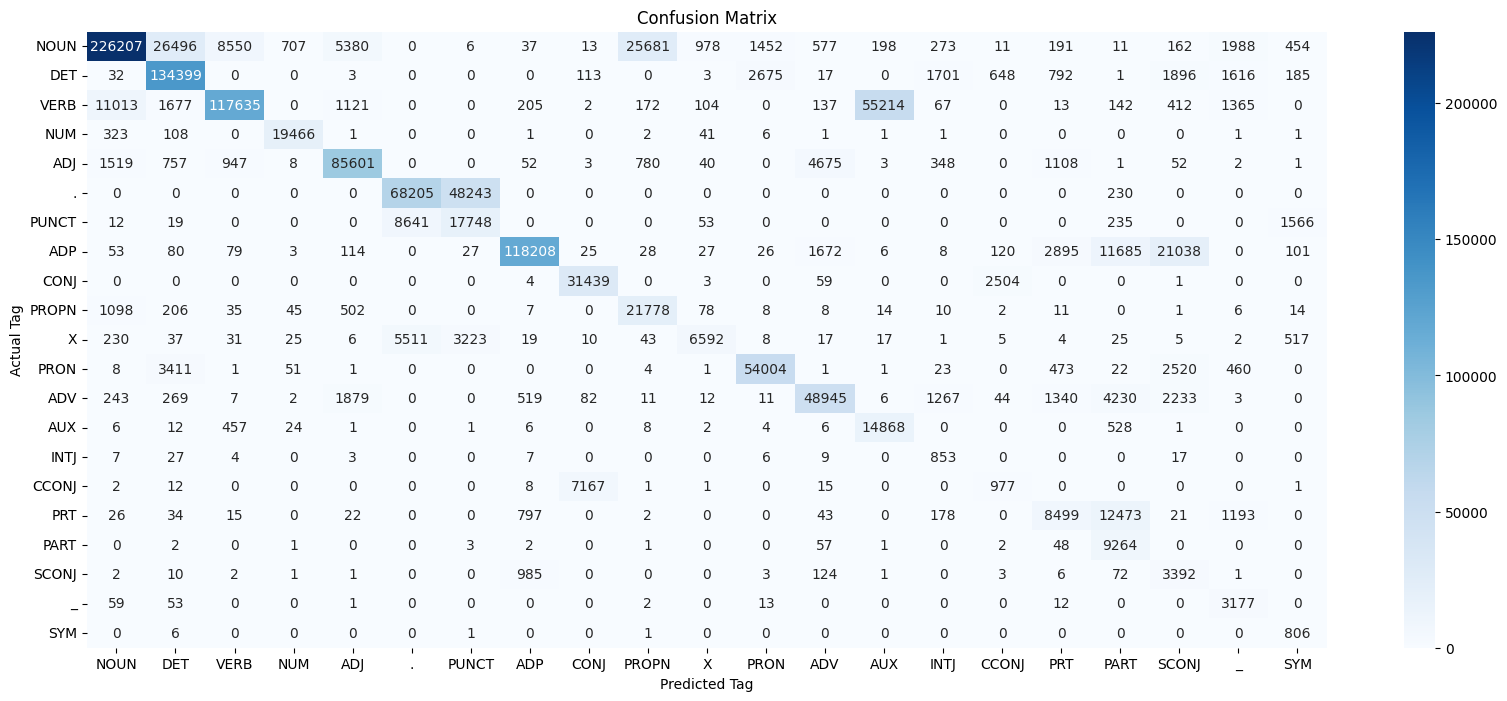

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique tags from tag_dict
unique_tags = list(tag_dict.keys())

cm = confusion_matrix(actual_tags, predicted_tags, labels=list(unique_tags))
plt.figure(figsize=(20, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    xticklabels=unique_tags,
    yticklabels=unique_tags,
    cmap="Blues",
)
plt.xlabel("Predicted Tag")
plt.ylabel("Actual Tag")
plt.title("Confusion Matrix")
plt.show()